<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('salary_data.csv')
print(dataset.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [11]:
# Prepare Features and Target
X = dataset['YearsExperience'].values.reshape(-1, 1)
y = dataset['Salary'].values

In [12]:
# Feature Scaling (Standardization)

X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)

X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

In [13]:
# Hypothesis Function
def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

In [14]:
# Cost Function (Mean Squared Error)

def cost_function(X, y, theta0, theta1):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta0, theta1) - y) ** 2)

# Gradient Descent Function

def gradient_descent(X, y, lr, epochs):
    theta0, theta1 = 0, 0
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = hypothesis(X, theta0, theta1)
        error = predictions - y

        # Update parameters
        theta0 -= lr * (1 / m) * np.sum(error)
        theta1 -= lr * (1 / m) * np.sum(error * X)

        # Record cost
        cost = cost_function(X, y, theta0, theta1)
        cost_history.append(cost)

        # Plot progress for visualization
        plt.figure(figsize=(6, 4))
        plt.scatter(X, y, color='blue')
        plt.plot(X, hypothesis(X, theta0, theta1), color='red')
        plt.title(f'Epoch {epoch + 1}')
        plt.xlabel('YearsExperience (scaled)')
        plt.ylabel('Salary (scaled)')
        plt.grid(True)
        plt.show()

    return theta0, theta1, cost_history

In [ ]:
# Try Different Learning Rates

learning_rates = [0.001, 0.01, 0.05, 0.1]
epochs = 10
results = {}

for lr in learning_rates:
    theta0, theta1, cost_hist = gradient_descent(X_scaled, y_scaled, lr, epochs)
    results[lr] = cost_hist[-1]
    print(f'Learning Rate: {lr}, Final Cost: {cost_hist[-1]:.6f}')


# Train Final Model (Best Parameters)

lr_best = 0.05
epochs_best = 10
theta0, theta1, cost_hist = gradient_descent(X_scaled, y_scaled, lr_best, epochs_best)

In [16]:
y_pred_scaled = hypothesis(X_scaled, theta0, theta1)
y_pred = y_pred_scaled * y_std + y_mean

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print(f"\nModel Evaluation:")
print(f"  R² Score : {r2:.4f}")


Model Evaluation:
  R² Score : -29.0000


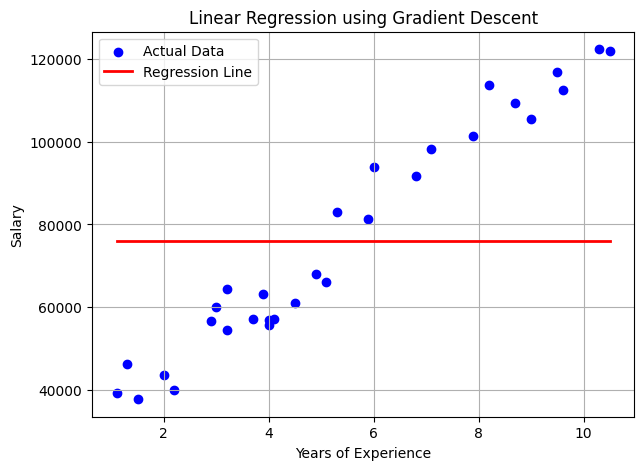

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='blue', label='Actual Data')
plt.plot(dataset['YearsExperience'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()